# Example 7.1.1-7.4.2 Vending Machines

Author: Marcel Steiner-Curtis \
Date: 
05.04.2019 sml, 
09.05.2022 sml: Julia-Jupyter Notebook

In [1]:
using DataFrames
using StatsPlots
using CSV
using GLM

## Example 7.1.1 Vending Machines

read data

In [2]:
cd("../04 Datasets")
data = CSV.read("vending-machines.dat", DataFrame); 
first(data, 5)

,Time,Volume,Distance,Town
,Float64,Int64,Int64,String15
1,16.68,7,560,San Diego
2,11.5,3,220,San Diego
3,12.03,3,340,San Diego
4,14.88,4,80,San Diego
5,13.75,6,150,San Diego


Scatter diagram: Time versus Volume

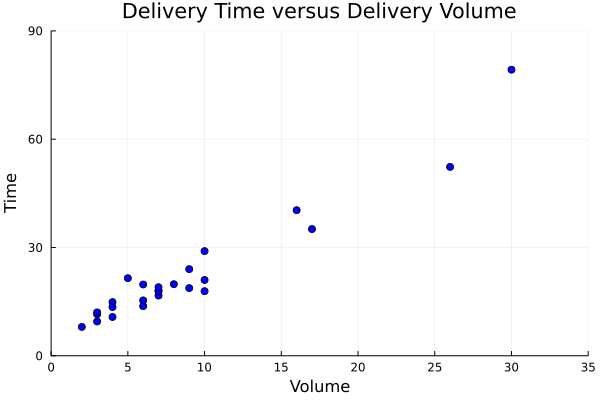

In [3]:
scatter(data.Volume, data.Time, mode="markers", 
    xlim=(0,35), 
    ylim=(0,90), 
    legend=false, 
    xlabel="Volume",
    ylabel="Time",
    color="blue",
    title="Delivery Time versus Delivery Volume")

REMARK: The diagram clearly indicates that there is a relationship between the delivery time and the delivery volume. The data points are not exactly on a straight line, but they scatter very close to one.

## Example 7.2.1 Parameter Estimation & 7.3.1+2 Testing Hypothesis

### estimation of the parameters <span style="color:red">(lm)</span>
For complience with R set `dropcollinear=true`.

In [4]:
mod = lm(@formula(Time ~ Volume), data, dropcollinear=true)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Time ~ 1 + Volume

Coefficients:
───────────────────────────────────────────────────────────────────────
               Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  3.32078     1.37107   2.42    0.0237   0.484498    6.15706
Volume       2.17617     0.12403  17.55    <1e-14   1.91959     2.43274
───────────────────────────────────────────────────────────────────────

residual standard error

In [5]:
sqrt(deviance(mod)/(nobs(mod)-2))

4.181396703331079

scatter diagram: Time versus Volume

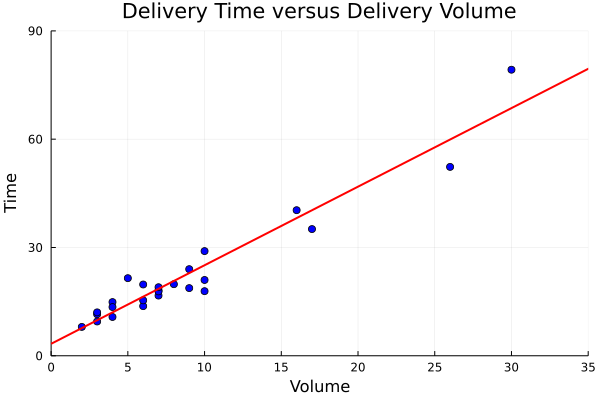

In [6]:
scatter(data.Volume, data.Time, mode="markers", 
    xlim=(0,35), 
    ylim=(0,90), 
    xlabel="Volume",
    ylabel="Time",
    color="blue",
    title="Delivery Time versus Delivery Volume")
#   add best model
dataNew = DataFrame(Volume=0:0.1:40)
plot!(dataNew.Volume, predict(mod, dataNew), legend=false, color="red", linewidth=2)

##  Example 7.3.3 Confidence Interval

95% confidence interval on the slope <span style="color:red">(lm)</span>

In [7]:
confint(mod, level=0.95)

2×2 Matrix{Float64}:
 0.484498  6.15706
 1.91959   2.43274

REMARK: The confidence interval of the slope contains $\beta_1=2$ and therefore a slope of 2 is very well compatible with the data.

## Example 7.4.1 Confidence Intervals on the Response & 7.4.2 Prediction Intervals

define a new `DataFrame` of equally spaced $x$-values covering at least the range of Volume-data

In [8]:
dataNew = DataFrame(Volume=-10:0.1:40)
Conf = predict(mod, dataNew, interval=:confidence, level=0.95)
first(Conf, 5)

,prediction,lower,upper
,Float64?,Float64?,Float64?
1,-18.4409,-23.5557,-13.3261
2,-18.2233,-23.3139,-13.1326
3,-18.0057,-23.0722,-12.9391
4,-17.788,-22.8305,-12.7456
5,-17.5704,-22.5887,-12.5521


In [9]:
Pred = predict(mod, dataNew, interval=:prediction, level=0.95)
first(Pred, 5)

,prediction,lower,upper
,Float64?,Float64?,Float64?
1,-18.4409,-28.4898,-8.39193
2,-18.2233,-28.26,-8.18658
3,-18.0057,-28.0301,-7.98118
4,-17.788,-27.8003,-7.77572
5,-17.5704,-27.5706,-7.57022


scatter diagram: Time versus Volume with confidence intervals on the response and prediction intervals

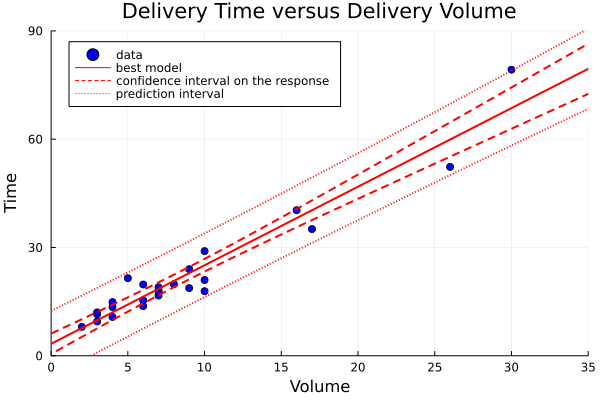

In [10]:
scatter(data.Volume, data.Time, mode="markers", 
    xlim=(0,35), 
    ylim=(0,90), 
    legend=false,
    label="data",
    xlabel="Volume",
    ylabel="Time",
    color="blue",
    title="Delivery Time versus Delivery Volume")
#   add best model
plot!(dataNew.Volume, predict(mod, dataNew), color="red", linewidth=2, label="best model", legend=:topleft)
#   add confidence intervals on the response
plot!(dataNew.Volume, Conf.lower, color="red", linewidth=2, linestyle=:dash, label="confidence interval on the response")
plot!(dataNew.Volume, Conf.upper, color="red", linewidth=2, linestyle=:dash, label=false)
#   add prediction intervals
plot!(dataNew.Volume, Pred.lower, color="red", linewidth=2, linestyle=:dot, label="prediction interval")
plot!(dataNew.Volume, Pred.upper, color="red", linewidth=2, linestyle=:dot, label=false)